In [1]:
%matplotlib inline
from typing import List, Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, to_rgb
import seaborn as sns
from ipywidgets import interact, fixed, IntSlider, FloatSlider, FloatLogSlider

# Choosing color palettes

This notebook is a Jupyter implementation of
"[Choosing color palettes](http://seaborn.pydata.org/tutorial/color_palettes.html)"(seaborn)
and also refers to 
"[Choosing Colormaps in Matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html)".

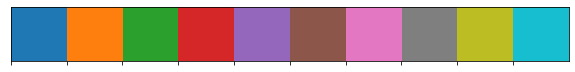

In [2]:
# Basic example
# If as_cmap is True, returns matplotlib.colors.Colormap
#     from seaborn 0.11.0 (Sep. 2020)
# desat = desaturate
sns.palplot(
    sns.color_palette(
        palette=None, n_colors=None, desat=None, as_cmap=False
    ), size=1
)

## Functions

In [87]:
color_palettes = {
    'qualitative': ' '.join([
        'deep muted pastel bright dark colorblind',  # seaborn original
        'tab10 tab20 tab20b tab20c',
        'Paired Accent Set1 Pastel1 Set2 Dark2 Pastel2 Set3',
    ]),
    'cyclic': ' '.join([
        'hls husl',  # seaborn original
        'hsv twilight twilight_shifted'
    ]),
    'hue': 'hls husl',
    'perceptual': ' '.join([
        'rocket mako crest',  # seaborn
        'viridis flare plasma inferno magma cividis',  # matplotlib
    ]),
    'cubehelix': 'cubehelix',
    'monotonic': ' '.join([
        'Greys Reds Greens Blues Oranges Purples',  # matplotlib (1 color)
        'RdPu GnBu BuPu BuGn OrRd PuBu PuRd YlGn',  # matplotlib (2 colors)
        'PuBuGn YlGnBu YlOrBr YlOrRd',  # matplotlib
        'binary gist_yarg gist_gray gray bone pink',  # matplotlib (binary and darken)
    ]),
    'diverging': ' '.join([
        'vlag icefire',  # seaborn (perceptually uniform)
        'PiYG PRGn BrBG PuOr RdGy RdBu',  # matplotlib (two colors)
        'RdYlBu RdYlGn Spectral coolwarm bwr seismic',  # matplotlib (three or more)
    ]),
    'twisting': ' '.join([
        'spring summer autumn winter cool Wistia',  # matplotlib (up and down)
        'hot afmhot gist_heat copper',  # matplotlib (kink)
    ]),
    'miscellaneous': ' '.join([
        'CMRmap brg flag gist_earth gist_ncar gist_rainbow gist_stern gnuplot gnuplot2',
        'inferno nipy_spectral ocean prism rainbow terrain turbo',
    ])
    # "jet" !!
}

In [52]:
def draw_color_palettes(
    palettes: List[str]
) -> None:
    fig, axes = plt.subplots(nrows=len(palettes), figsize=(6.4, len(palettes) * 0.4))
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    if axes.__class__.__name__ != 'ndarray':
        axes = np.array([axes])
    for ax, palette in zip(axes, palettes):
        cmap = sns.color_palette(
            palette=palette, as_cmap=True
        )
        if cmap.__class__.__name__ == 'list':
            cmap = LinearSegmentedColormap.from_list(
                name=palette, N=len(cmap),
                colors=[
                    to_rgb(x) for x in cmap
                ]
            )
        ax.imshow(gradient, aspect='auto', cmap=cmap)
        ax.set_axis_off()
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, palette, va='center', ha='right', fontsize=14)
    return

In [53]:
def draw_each_color_palette(
    palette: str,
    reverse: bool,
    n_colors: Optional[int],
    desaturation: Optional[float] = 1.0
) -> None:
    if reverse:
        palette += '_r'
    pal = sns.color_palette(
        palette=palette, n_colors=n_colors, desat=desaturation, as_cmap=False
    )
    fig, ax = plt.subplots(1, 1, figsize=(n_colors, 1))
    ax.imshow(
        np.arange(n_colors).reshape(1, n_colors),
        cmap=ListedColormap(list(pal)),
        interpolation='nearest', aspect='auto'
    )
    ax.set_xticks(np.arange(n_colors))
    ax.set_yticks([])
    ax.set_xticklabels([str(i) for i in range(n_colors)])
    ax.yaxis.set_major_locator(ticker.NullLocator())
    return

In [54]:
def draw_hue_color_palette(
    palette: str,
    n_colors: Optional[int],
    first_hue: Optional[float],
    lightness: Optional[float],
    saturation: Optional[float]
) -> None:
    pal = eval(f'sns.{palette}_palette')(
        n_colors=n_colors, h=first_hue, l=lightness, s=saturation, as_cmap=False
    )
    fig, ax = plt.subplots(1, 1, figsize=(n_colors, 1))
    ax.imshow(
        np.arange(n_colors).reshape(1, n_colors),
        cmap=ListedColormap(list(pal)),
        interpolation='nearest', aspect='auto'
    )
    ax.set_xticks(np.arange(n_colors))
    ax.set_yticks([])
    ax.set_xticklabels([str(i) for i in range(n_colors)])
    ax.yaxis.set_major_locator(ticker.NullLocator())
    return

In [55]:
def draw_cubehelix_color_palette(
    reverse: bool,
    n_colors: Optional[int],
    start_hue: Optional[float],
    n_rotations: Optional[float],
    gamma: Optional[float],
    hue: Optional[float],
    lightest: Optional[float],
    darkest: Optional[float]
) -> None:
    pal = sns.cubehelix_palette(
        n_colors=n_colors, start=start_hue, rot=n_rotations,
        gamma=gamma, hue=hue, light=lightest, dark=darkest,
        reverse=reverse, as_cmap=False
    )
    fig, ax = plt.subplots(1, 1, figsize=(n_colors, 1))
    ax.imshow(
        np.arange(n_colors).reshape(1, n_colors),
        cmap=ListedColormap(list(pal)),
        interpolation='nearest', aspect='auto'
    )
    ax.set_xticks(np.arange(n_colors))
    ax.set_yticks([])
    ax.set_xticklabels([str(i) for i in range(n_colors)])
    ax.yaxis.set_major_locator(ticker.NullLocator())
    return

## Qualitative Color Palettes

Use for representing categorical data

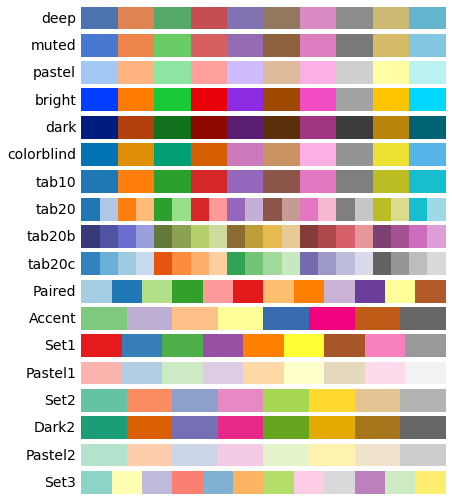

In [88]:
draw_color_palettes(palettes=color_palettes['qualitative'].split())

In [57]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['qualitative'].split(),
    reverse=fixed(False),
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('deep', 'muted', 'pastel', 'bright', 'dark', 'c…

## Sequential Color Palettes

### Cyclic Color Palettes

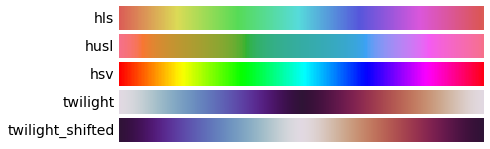

In [89]:
draw_color_palettes(palettes=color_palettes['cyclic'].split())

In [59]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['cyclic'].split(),
    reverse=fixed(False),
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('hls', 'husl', 'twilight', 'twilight_shifted', …

In [60]:
# Adjust hue as you like
_ = interact(
    draw_hue_color_palette,
    palette=color_palettes['hue'].split(),
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    first_hue=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.01),
    lightness=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.6),
    saturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.65)
)

interactive(children=(Dropdown(description='palette', options=('hls', 'husl'), value='hls'), IntSlider(value=1…

### Perceptually Uniform Color Palettes

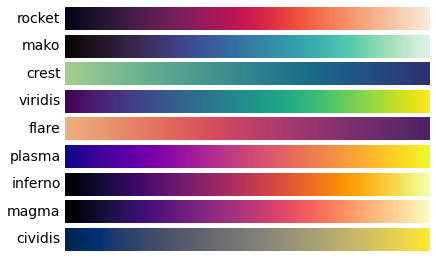

In [61]:
draw_color_palettes(palettes=color_palettes['perceptual'].split())

In [62]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['perceptual'].split(),
    reverse=False,
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('rocket', 'mako', 'crest', 'viridis', 'flare', …

### Cubehelix Color Palettes

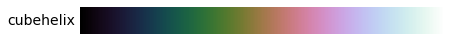

In [63]:
draw_color_palettes(palettes=color_palettes['cubehelix'].split())

In [64]:
# Adjust hue as you like
_ = interact(
    draw_cubehelix_color_palette,
    reverse=False,
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    start_hue=FloatSlider(min=0.0, max=3.0, step=0.01, value=0.0),
    n_rotations=FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.4),
    gamma=FloatSlider(min=0.0, max=20.0, step=0.1, value=1.0),
    hue=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.8),
    lightest=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.85),
    darkest=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.15)
)

interactive(children=(Checkbox(value=False, description='reverse'), IntSlider(value=10, description='n_colors'…

### Monotonic Color Palettes

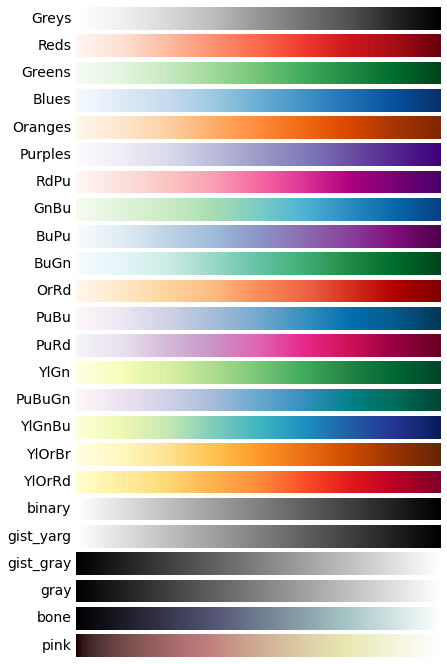

In [65]:
draw_color_palettes(palettes=color_palettes['monotonic'].split())

In [66]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['monotonic'].split(),
    reverse=False,
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', …

### Twisting Color Palettes

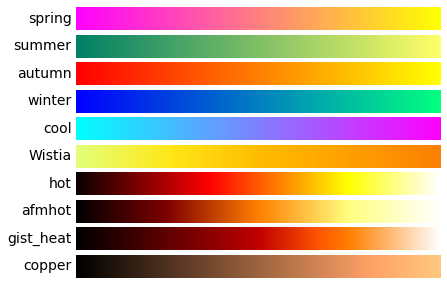

In [67]:
draw_color_palettes(palettes=color_palettes['twisting'].split())

In [68]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['twisting'].split(),
    reverse=False,
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('spring', 'summer', 'autumn', 'winter', 'cool',…

### Diverging Color Palettes

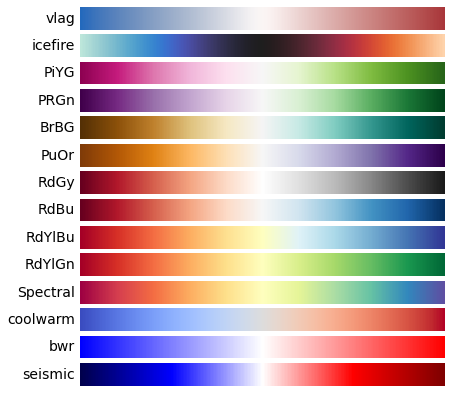

In [69]:
draw_color_palettes(palettes=color_palettes['diverging'].split())

In [70]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['diverging'].split(),
    reverse=False,
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('vlag', 'icefire', 'PiYG', 'PRGn', 'BrBG', 'PuO…

### Misc Color Pallets

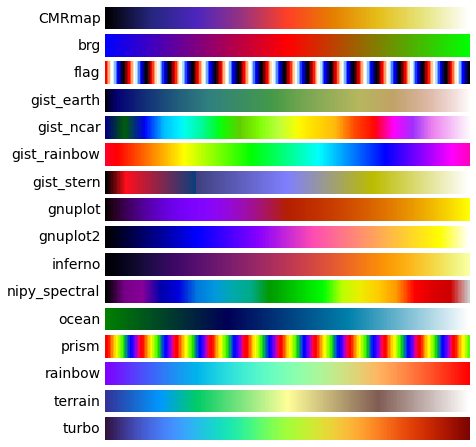

In [83]:
draw_color_palettes(palettes=color_palettes['misc'].split())

In [84]:
# Check color palette interactively
_ = interact(
    draw_each_color_palette,
    palette=color_palettes['misc'].split(),
    reverse=False,
    n_colors=IntSlider(min=1, max=48, step=1, value=10),
    desaturation=FloatSlider(min=0.0, max=1.0, step=0.01, value=1.0)
)

interactive(children=(Dropdown(description='palette', options=('CMRmap', 'brg', 'flag', 'gist_earth', 'gist_nc…

In [ ]:
# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps.items():
    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axes = plt.subplots(nrows=nsubplots, squeeze=False,
                             figsize=(7, 2.6*nsubplots))

    for i, ax in enumerate(axes.flat):

        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = cm.get_cmap(cmap)(x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # http://stackoverflow.com/questions/8202605/

            if cmap_category == 'Sequential':
                # These colormaps all start at high lightness but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j*dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ('Perceptually Uniform Sequential',
                                 'Sequential'):
                locs.append(x[-1] + j*dc)
            elif cmap_category in ('Diverging', 'Qualitative', 'Cyclic',
                                   'Miscellaneous', 'Sequential (2)'):
                locs.append(x[int(x.size/2.)] + j*dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axes[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)
        ax.set_ylabel('Lightness $L^*$', fontsize=12)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.show()

### 連続カラーパレット (Sequencial color palettes)

In [ ]:
# 基本
sns.palplot(sns.color_palette("Blues"))
# dark
sns.palplot(sns.color_palette("Blues_d"))
# reverse
sns.palplot(sns.color_palette("Blues_r"))

In [ ]:
sns.choose_colorbrewer_palette('sequential');

### cubehelix_paletteを用いた連続カラーパレット (Sequential palettes with cubehelix_palette())

In [ ]:
sns.palplot(sns.light_palette("blue", 24))
sns.palplot(sns.dark_palette("blue", 24))

In [ ]:
def show_pal3(light_or_dark, color, reverse):
    sns.palplot(eval('sns.%s_palette'%light_or_dark)(color=color, n_colors=24, reverse=reverse))
interact(show_pal3, light_or_dark=('light', 'dark'), color=('blue', 'navy', 'green', 'palegreen', 'red'), reverse=False);

In [ ]:
sns.palplot(sns.diverging_palette(220, 20, n=24))
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=24))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=24, center="dark"))

In [ ]:
def show_pal4(h_neg, h_pos, s, l, center):
    sns.palplot(sns.diverging_palette(h_neg, h_pos, n=24, s=s, l=l, center=center))
interact(show_pal4, h_neg=FloatSlider(220, max=360), h_pos=FloatSlider(20, max=360), 
         s=FloatSlider(75, max=99), l=FloatSlider(50, max=99), center=('light', 'dark'));